In [27]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

# 1. Lectura de los datos

In [28]:
etiquetas = pd.read_csv("GroceryStoreDataset-master/dataset/classes.csv")

etiquetas = etiquetas[["Coarse Class Name (str)", "Coarse Class ID (int)"]]
etiquetas.head()

,Coarse Class Name (str),Coarse Class ID (int)
0,Apple,0
1,Apple,0
2,Apple,0
3,Apple,0
4,Apple,0


In [29]:
etiq = []

for i in range(len(etiquetas)):
    etiqueta = etiquetas.loc[i]
    etiq.append((etiqueta["Coarse Class Name (str)"], int(etiqueta["Coarse Class ID (int)"])))

etiq = set(etiq)

In [30]:
etiq = list(etiq)
etiquetas = {i[1]: i[0] for i in etiq}

In [31]:
len(etiquetas)

43

In [32]:
dataset_route = "GroceryStoreDataset-master/"
# Función para abrir una imagen y convertirla en un array
def cargar_imagen(ruta):
    try:
        # Abre la imagen y la convierte a modo RGB
        imagen = Image.open(f"{dataset_route}dataset/{ruta}").convert('RGB')
        # Convierte la imagen en un array de numpy
        imagen_array = np.array(imagen)
        return imagen_array
    except Exception as e:
        print(f"Error al cargar la imagen en {ruta}: {e}")
        return None


In [33]:
train= pd.read_csv(f"{dataset_route}dataset/train.txt")
# Aplica la función de carga a cada ruta de imagen y almacena los arrays en una nueva columna
train['image_array'] = train['route'].apply(cargar_imagen)
train['Coarse Class str'] = train['Coarse Class ID'].apply(lambda x: etiquetas.get(x, "No Aplica"))
train.head()

,route,Class ID,Coarse Class ID,image_array,Coarse Class str
0,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"[[[20, 8, 12], [20, 8, 12], [19, 9, 10], [20, ...",Apple
1,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"[[[147, 20, 37], [156, 31, 47], [153, 32, 47],...",Apple
2,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"[[[89, 61, 13], [86, 58, 8], [82, 54, 4], [77,...",Apple
3,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"[[[193, 144, 26], [192, 142, 27], [190, 140, 2...",Apple
4,train/Fruit/Apple/Golden-Delicious/Golden-Deli...,0,0,"[[[101, 23, 19], [101, 23, 19], [101, 23, 19],...",Apple


In [34]:
test= pd.read_csv(f"{dataset_route}dataset/test.txt")
# Aplica la función de carga a cada ruta de imagen y almacena los arrays en una nueva columna
test['image_array'] = test['route'].apply(cargar_imagen)
test['Coarse Class str'] = test['Coarse Class ID'].apply(lambda x: etiquetas.get(x, "No Aplica"))
test.head()

,route,Class ID,Coarse Class ID,image_array,Coarse Class str
0,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"[[[138, 117, 8], [139, 118, 9], [141, 119, 8],...",Apple
1,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"[[[143, 57, 40], [138, 49, 33], [139, 36, 27],...",Apple
2,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"[[[48, 37, 0], [58, 47, 0], [68, 57, 0], [74, ...",Apple
3,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"[[[114, 41, 35], [106, 33, 27], [102, 29, 23],...",Apple
4,test/Fruit/Apple/Golden-Delicious/Golden-Delic...,0,0,"[[[77, 12, 16], [75, 13, 16], [73, 13, 15], [6...",Apple


In [35]:
val= pd.read_csv(f"{dataset_route}dataset/val.txt")
# Aplica la función de carga a cada ruta de imagen y almacena los arrays en una nueva columna
val['image_array'] = val['route'].apply(cargar_imagen)
val['Coarse Class str'] = val['Coarse Class ID'].apply(lambda x: etiquetas.get(x, "No Aplica"))
val.head()

,route,Class ID,Coarse Class ID,image_array,Coarse Class str
0,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"[[[113, 122, 69], [113, 122, 69], [112, 121, 6...",Apple
1,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"[[[30, 33, 40], [49, 53, 56], [53, 53, 51], [4...",Apple
2,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"[[[41, 28, 20], [41, 28, 20], [40, 27, 19], [4...",Apple
3,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"[[[16, 20, 21], [15, 19, 20], [16, 20, 19], [1...",Apple
4,val/Fruit/Apple/Golden-Delicious/Golden-Delici...,0,0,"[[[168, 147, 104], [167, 146, 101], [165, 145,...",Apple


# 1. Estructuras de los datos

In [36]:
print("Dimensiones de los datasets:")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")
print(f"Val: {val.shape}")

Dimensiones de los datasets:
Train: (2640, 5)
Test: (2485, 5)
Val: (296, 5)


Como vemos, los datos de entrenamiento, testing y validación cuentan con 2640 datos, 2485 datos y 296 datos, respectivamente

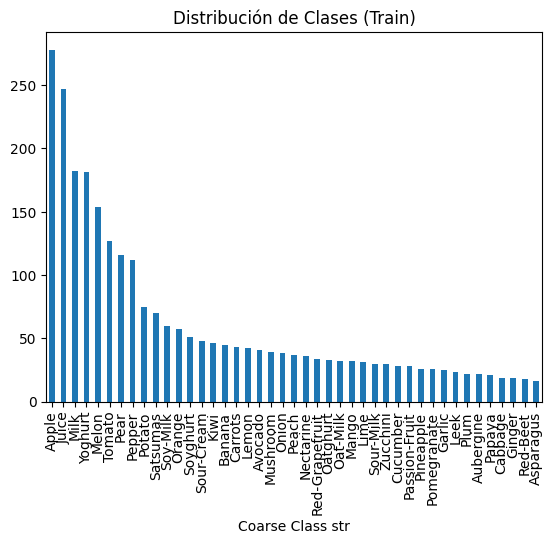

In [37]:
train_class_distribution = train['Coarse Class str'].value_counts()
test_class_distribution = test['Coarse Class str'].value_counts()
val_class_distribution = val['Coarse Class str'].value_counts()

# Visualización opcional
train_class_distribution.plot(kind='bar', title="Distribución de Clases (Train)")
plt.show()

Como vemos, los productos que más aparecen en el dataset de imágenes son manzanas, jugos y leche

/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_12673/2245737946.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(class_distribution.index, rotation=90)


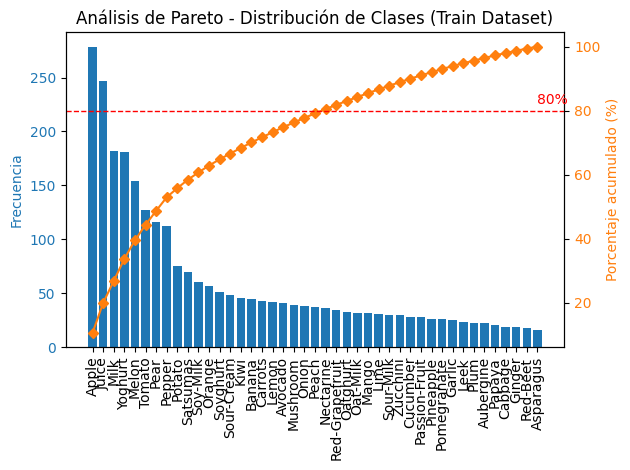

In [38]:
class_distribution = train['Coarse Class str'].value_counts()

cumulative_percentage = class_distribution.cumsum() / class_distribution.sum() * 100

fig, ax1 = plt.subplots()

ax1.bar(class_distribution.index, class_distribution, color="C0")
ax1.set_ylabel('Frecuencia', color="C0")
ax1.tick_params(axis='y', labelcolor="C0")
ax1.set_xticklabels(class_distribution.index, rotation=90)

ax2 = ax1.twinx()
ax2.plot(class_distribution.index, cumulative_percentage, color="C1", marker="D", ms=5)
ax2.set_ylabel('Porcentaje acumulado (%)', color="C1")
ax2.tick_params(axis='y', labelcolor="C1")

ax2.axhline(80, color='r', linestyle='--', linewidth=1)
ax2.text(len(class_distribution) - 1, 82, "80%", color="red", fontsize=10)

plt.title("Análisis de Pareto - Distribución de Clases (Train Dataset)")
plt.tight_layout()
plt.show()

Como vemos, existen muchas clases que están muy subrepresentados, por lo que es necesario realizar un balanceo de datos usando 

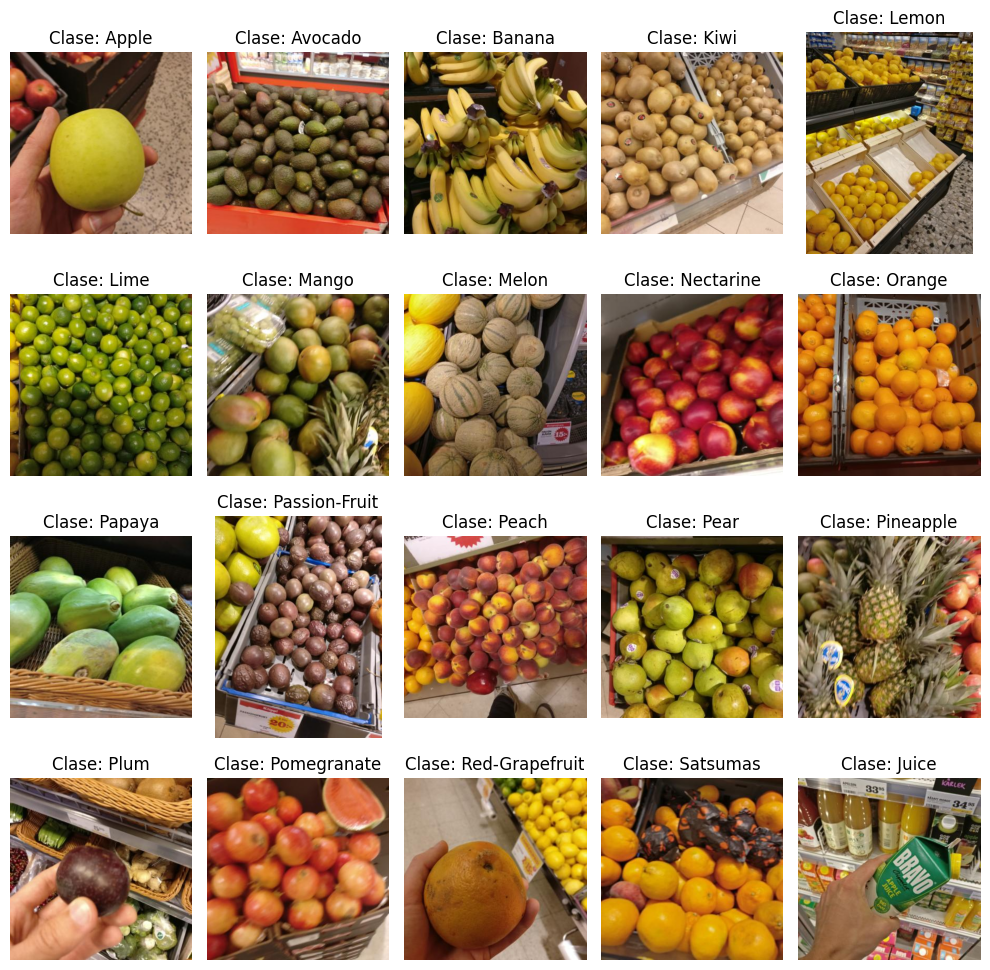

In [39]:
fig, axs = plt.subplots(4, 5, figsize=(10, 10))

# Mostrar cada imagen en una posición de la cuadrícula
for i, ax in enumerate(axs.flat):
    classes = train[train["Coarse Class ID"] == i]
    image_array = np.array(classes.iloc[0]['image_array'])
    ax.imshow(image_array)
    ax.set_title(f"Clase: {classes.iloc[0]['Coarse Class str']}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [40]:
max_height, max_width, max_area = 0, 0, 0
min_height, min_width, min_area = float('inf'), float('inf'), float('inf')

for idx, row in train.iterrows():
    image_array = np.array(row['image_array'])
    height, width = image_array.shape[:2]
    area = height * width

    if height > max_height:
        max_height = height
    if width > max_width:
        max_width = width
    if area > max_area:
        max_area = area

    if height < min_height:
        min_height = height
    if width < min_width:
        min_width = width
    if area < min_area:
        min_area = area

print("Máxima altura:", max_height)
print("Máxima anchura:", max_width)
print("Máxima área:", max_area)
print("Mínima altura:", min_height)
print("Mínima anchura:", min_width)
print("Mínima área:", min_area)

Máxima altura: 464
Máxima anchura: 464
Máxima área: 161472
Mínima altura: 348
Mínima anchura: 348
Mínima área: 121104


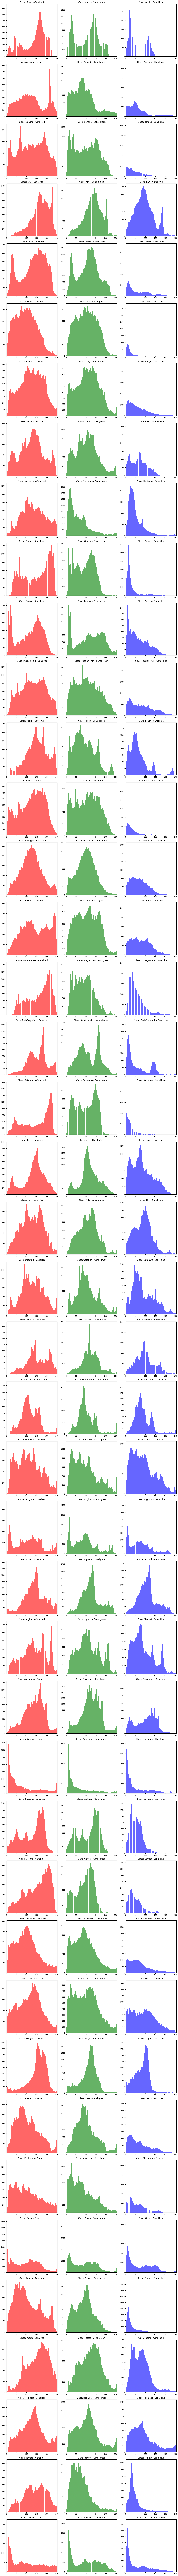

In [41]:
classes = train['Coarse Class str'].unique()

fig, axs = plt.subplots(len(classes), 3, figsize=(15, 5 * len(classes)))

for i, class_name in enumerate(classes):

    example_image = train[train['Coarse Class str'] == class_name].iloc[0]['image_array']
    image_array = np.array(example_image)
    
    colors = ('red', 'green', 'blue')
    for j, color in enumerate(colors):
        axs[i, j].hist(image_array[:, :, j].ravel(), bins=256, color=color, alpha=0.6)
        axs[i, j].set_title(f'Clase: {class_name} - Canal {color}')
        axs[i, j].set_xlim([0, 256])

plt.tight_layout()
plt.show()


Como vemos, si existen diferencias significativas en las distribuciones de las clases, por lo que puede ser interesante incluir información estadistica de los histogramas para los entrenamientos de los modelos

Dada la subrepresentación de muchas clases, se definió un umbral de al menos 20 imágenes para una clase con el fin de ser considerada como una clase para ser clasificada, asimismo, se va a hacer un sampleo de todas las clases con más de 20 imágenes

In [42]:
class_counts = train['Coarse Class str'].value_counts()

scarce_class_threshold = 50 

scarce_classes = class_counts[class_counts>30].index
scarce_train = train[train['Coarse Class str'].isin(scarce_classes)]

In [43]:
class_counts = train['Coarse Class str'].value_counts()

In [44]:
# Configuración del generador de aumento de datos
augmentation_generator = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    brightness_range=[0.8, 1.2]
)

In [45]:
# Crear imágenes aumentadas para cada clase escasa
'''
for class_name in scarce_classes:
    # Filtrar las imágenes de la clase actual
    class_images = scarce_train[scarce_train['Coarse Class str'] == class_name]
    
    for idx, row in class_images.iterrows():
        image_array = np.array(row['image_array'])
        image = np.expand_dims(image_array, axis=0)  # Añadir batch dimension

        # Generar imágenes aumentadas
        aug_iter = augmentation_generator.flow(image, batch_size=1)
        
        for i in range(num_augmented_per_image):
            aug_image = next(aug_iter)[0].astype(np.uint8)
            
            # Crear un diccionario con la información de la imagen aumentada
            augmented_row = {
                'route': f"augmented_{idx}_{i}",   # Ruta simulada o identificador único
                'Class ID': row['Class ID'],
                'Coarse Class ID': row['Coarse Class ID'],
                'image_array': aug_image,
                'Coarse Class str': row['Coarse Class str']
            }
            
            # Agregar la imagen aumentada al nuevo DataFrame
            augmented_images_data.append(augmented_row)

# Convertir la lista de datos aumentados en un DataFrame
augmented_df = pd.DataFrame(augmented_images_data)

# Concatenar el dataset original de entrenamiento con el dataset de imágenes aumentadas
train_augmented = pd.concat([train, augmented_df], ignore_index=True)

# Mostrar la nueva cantidad de imágenes por clase
print("Distribución de clases después del aumento:")
print(train_augmented['Coarse Class str'].value_counts())
'''

'\nfor class_name in scarce_classes:\n    # Filtrar las imágenes de la clase actual\n    class_images = scarce_train[scarce_train[\'Coarse Class str\'] == class_name]\n    \n    for idx, row in class_images.iterrows():\n        image_array = np.array(row[\'image_array\'])\n        image = np.expand_dims(image_array, axis=0)  # Añadir batch dimension\n\n        # Generar imágenes aumentadas\n        aug_iter = augmentation_generator.flow(image, batch_size=1)\n        \n        for i in range(num_augmented_per_image):\n            aug_image = next(aug_iter)[0].astype(np.uint8)\n            \n            # Crear un diccionario con la información de la imagen aumentada\n            augmented_row = {\n                \'route\': f"augmented_{idx}_{i}",   # Ruta simulada o identificador único\n                \'Class ID\': row[\'Class ID\'],\n                \'Coarse Class ID\': row[\'Coarse Class ID\'],\n                \'image_array\': aug_image,\n                \'Coarse Class str\': row[\

Vemos ahora la representación de clases una vez se realiza el aumento

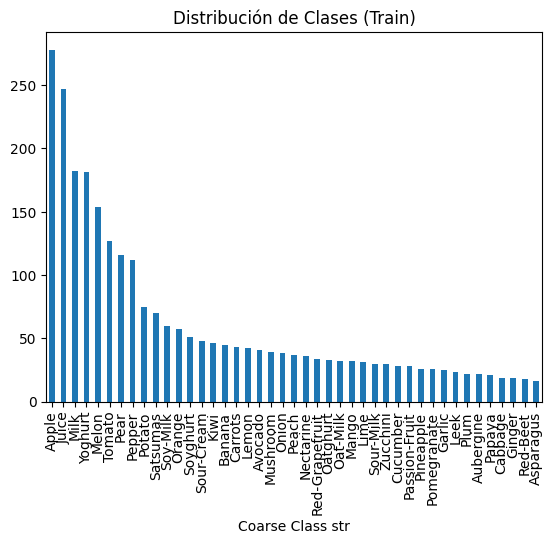

In [46]:
train_class_distribution = train['Coarse Class str'].value_counts()
test_class_distribution = test['Coarse Class str'].value_counts()
val_class_distribution = val['Coarse Class str'].value_counts()

# Visualización opcional
train_class_distribution.plot(kind='bar', title="Distribución de Clases (Train)")
plt.show()

In [47]:
def extract_color_statistics(image):
    stats = {}
    for i, color in enumerate(['R', 'G', 'B']):
        channel = image[:, :, i].ravel()
        
        stats[f'{color}_mean'] = np.mean(channel)
        stats[f'{color}_std'] = np.std(channel)
        stats[f'{color}_median'] = np.median(channel)
        stats[f'{color}_25th'] = np.percentile(channel, 25)
        stats[f'{color}_75th'] = np.percentile(channel, 75)
        
        stats[f'{color}_skew'] = skew(channel)
        stats[f'{color}_kurtosis'] = kurtosis(channel)
        
    return stats

train_stats = train['image_array'].apply(lambda img: extract_color_statistics(np.array(img)))
train_stats_df = pd.DataFrame(list(train_stats))

train= pd.concat([train, train_stats_df], axis=1)


In [48]:
train.columns

Index(['route', 'Class ID', 'Coarse Class ID', 'image_array',
       'Coarse Class str', 'R_mean', 'R_std', 'R_median', 'R_25th', 'R_75th',
       'R_skew', 'R_kurtosis', 'G_mean', 'G_std', 'G_median', 'G_25th',
       'G_75th', 'G_skew', 'G_kurtosis', 'B_mean', 'B_std', 'B_median',
       'B_25th', 'B_75th', 'B_skew', 'B_kurtosis'],
      dtype='object')

In [49]:
# Guardar el dataset aumentado como un archivo pickle
train = train.dropna()
with open('train.pkl', 'wb') as file:
    pickle.dump(train, file)

In [50]:
test_stats = test['image_array'].apply(lambda img: extract_color_statistics(np.array(img)))
test_stats_df = pd.DataFrame(list(test_stats))

test= pd.concat([test, test_stats_df], axis=1)
test = test.dropna()
# Guardar el dataset aumentado como un archivo pickle
with open('test.pkl', 'wb') as file:
    pickle.dump(test, file)

In [51]:
val_stats = val['image_array'].apply(lambda img: extract_color_statistics(np.array(img)))
val_stats_df = pd.DataFrame(list(val_stats))

val = pd.concat([val, val_stats_df], axis=1)
val = val.dropna()
# Guardar el dataset aumentado como un archivo pickle
with open('val.pkl', 'wb') as file:
    pickle.dump(val, file)

def extract_color_statistics(image):
    stats = {}
    for i, color in enumerate(['R', 'G', 'B']):
        channel = image[:, :, i].ravel()
        
        stats[f'{color}_mean'] = np.mean(channel)
        stats[f'{color}_std'] = np.std(channel)
        stats[f'{color}_median'] = np.median(channel)
        stats[f'{color}_25th'] = np.percentile(channel, 25)
        stats[f'{color}_75th'] = np.percentile(channel, 75)
        
        stats[f'{color}_skew'] = skew(channel)
        stats[f'{color}_kurtosis'] = kurtosis(channel)
        
    return stats

train_stats = train['image_array'].apply(lambda img: extract_color_statistics(np.array(img)))
train_stats_df = pd.DataFrame(list(train_stats))

train= pd.concat([train, train_stats_df], axis=1)

Ahora, en cada uno de los datasets, en un notebook anterior incluí información estadística de la distribución de cada uno de los canales. Esto, con el fin de probar si es posible mejorar el desempeño del modelo, hay alguna forma de incluir otro modelo 